Welcome,

In this project we are working with credit card fraud detection dataset to predict that a transaction is frauduelent or not.

We will analyse it with the help of tools like Machine Learning.

Let's get started with by importing nessecary libraries.


In [ ]:
pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pratikicecool96","key":"7ff0e2f6906e6b79b26bd569ad6b1a2f"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 99% 65.0M/66.0M [00:00<00:00, 247MB/s]
100% 66.0M/66.0M [00:00<00:00, 224MB/s]


In [ ]:
! unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the creditcard dataset

In [ ]:
df=pd.read_csv('/content/creditcard.csv')

Using head functions to have a glimpse at the data and its constituents.


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Using shape to know about the dimension of the dataset (Rows, Columns)

In [ ]:
df.shape

(284807, 31)

Using info method to get a more about the data types and null count.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Using Describe to know more about the numerical columns in the dataset.



In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


We are veiwing the columns using columns function to get more details about what data the dataset has in it.

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Plotting a graph with the help of heatmapp to know the coorealtion between the columns in the dataset.

<Axes: >

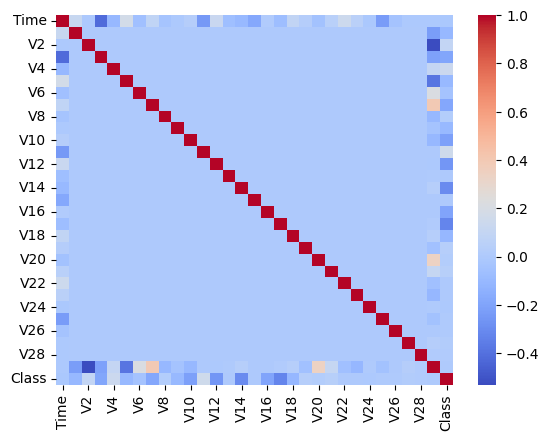

In [ ]:
corr=df.corr()
sns.heatmap(corr,cmap='coolwarm')

To know in depth what is columns are highly coorelated to fraud we will use corrwith fucntion to see coorelation of columns and the fraud.

<Axes: >

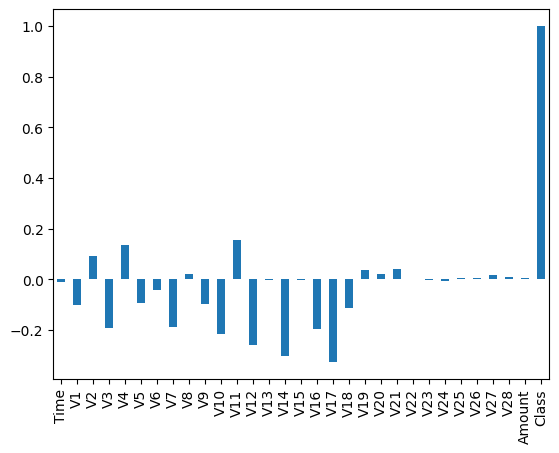

In [ ]:
cw=df.corrwith(df['Class'])
cw.plot(kind='bar')

To know the total instances of fraud in the dataset we will use value_counts.

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Plotting a graph to know the relation between time and amount columns.

<Axes: xlabel='Time', ylabel='Amount'>

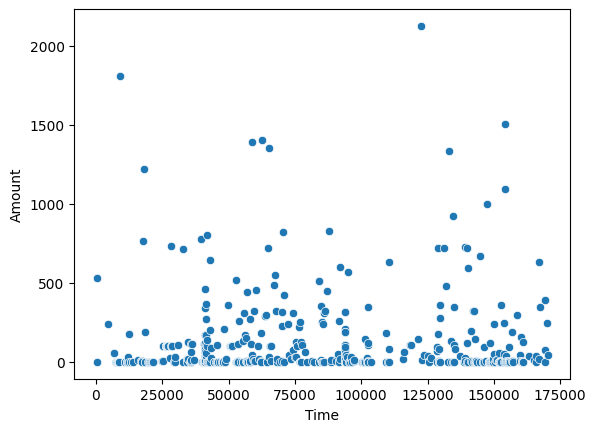

In [ ]:
sns.scatterplot(x='Time',y='Amount',data=df[df['Class']==1])

In [ ]:
vec=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']


Plotting a graph to view the mean values of each columns which contain vector values.

<Axes: >

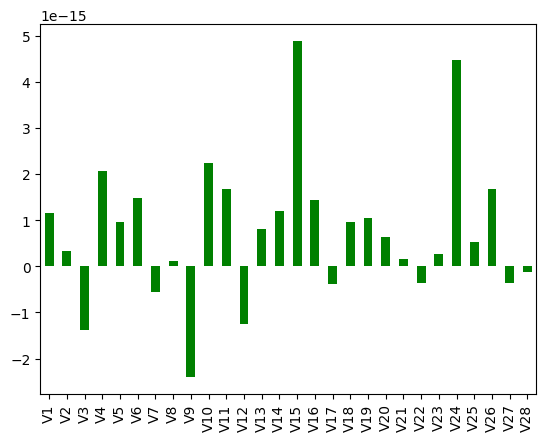

In [ ]:
vec_mean=df[vec].mean()
vec_mean.plot(kind='bar',color='green')

We need to balance the dataset as there is far less fraud instances in the dataset which will lead to underfitting the model.

In [ ]:
cl=df['Class'].value_counts()
(cl[0]/(cl[0]+cl[1]))*100

99.82725143693798

Importing Random Over Sampler from imblearn module.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Spltting data into x and y to perform model fiting process.

In [ ]:
x=df.drop('Class',axis=1)
y=df['Class']

We will need to normalize the data in order to make our model more accurate by recognising the data points which are more likely to be outliers.

In [ ]:
scaler= StandardScaler()
x=scaler.fit_transform(x)

Splitting x & y further to check the accuracy after fitting and prediction by dividing into train and test values.

In [ ]:
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.25,random_state=42)

Importing more Libraries.

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score


Creating a function to check which model will give us the best accuracy and cross-val score so that we can move further with algorithm.


In [ ]:
def classify(classification,x_train,y_train,x_test,y_test):
    clf=classification.fit(x_train,y_train)
    pred=clf.predict(x_test)
    print('='*35)
    print(i)
    print('-'*35)
    print('Confusion Matrix=','\n',confusion_matrix(y_test,pred>0.5))
    print('-'*35)
    acc=accuracy_score(y_test,pred>0.5)
    print('Accuracy score=',acc)
    print('-'*35)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_report=cross_val_score(i,x,y,cv=kfold,scoring='accuracy')
    print('Cross-Validation Score=',cv_report.mean())
    print('-'*35)
    print('Roc-Auc-Score=',roc_auc_score(y_test,pred))
    print('='*35)


Creating a list of models which will go into the function in order to check accuraccy

In [ ]:
models = [
    LinearRegression(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    SVC(),
    KNeighborsClassifier()
]


For the purpose of Cross-validation we will choose StratifiedKFold.

In [ ]:
 kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Sampling the data in equal proportions to make the dataset more balanced.

In [ ]:
ros=RandomOverSampler(random_state=0)
x_resampled,y_resampled=ros.fit_resample(x,y)

In [ ]:
from collections import Counter
print(sorted(Counter(y_resampled).items()),y_resampled.shape)

[(0, 284315), (1, 284315)] (568630,)


In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

Now we will use the fuction we created in order to find the best model with highest accuracy.

In [ ]:
for i in models:
  classify(i,x_resampled,y_resampled,x_te,y_te)

LinearRegression()
-----------------------------------
Confusion Matrix= 
 [[70136   953]
 [   14    99]]
-----------------------------------
Accuracy score= 0.986418920816831
-----------------------------------
Cross-Validation Score= nan
-----------------------------------
Roc-Auc-Score= 0.9758858925064269
LogisticRegression()
-----------------------------------
Confusion Matrix= 
 [[69503  1586]
 [    8   105]]
-----------------------------------
Accuracy score= 0.9776129883992023
-----------------------------------
Cross-Validation Score= 0.9992064807078554
-----------------------------------
Roc-Auc-Score= 0.9534467388940474
DecisionTreeClassifier()
-----------------------------------
Confusion Matrix= 
 [[71089     0]
 [    0   113]]
-----------------------------------
Accuracy score= 1.0
-----------------------------------
Cross-Validation Score= 0.9991503018572189
-----------------------------------
Roc-Auc-Score= 1.0
RandomForestClassifier()
-----------------------------------

We are going to move forward with KNeighboursClassifier to use in our model.

In [ ]:
clf=KNeighborsClassifier()

In [ ]:
clf.fit(x_resampled,y_resampled)

In [ ]:
pred=clf.predict(x_te)

In [ ]:
print('Acuraccy Score :',accuracy_score(y_te,pred>0.5))
print('\n')
print('Classification Report :','\n',classification_report(y_te,pred>0.5))
print('\n')
print('Confusion Matrix :','\n',confusion_matrix(y_te,pred>0.5))